In [38]:
import os
import pickle

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
os.listdir('data')

['TSC_Price_Changes.csv',
 'Competitors_Price_Changes.csv',
 'TSC_Sales_Data.csv']

In [12]:
def to_date(string):
    try:
        converted = pd.to_datetime(string)
    except:
        converted = np.NaN
    return converted

In [19]:
price_changes = pd.read_csv(
    'data/TSC_Price_Changes.csv',
    converters={
        1: to_date,
        2: to_date
    }
    
)
competitors_changes = pd.read_csv(
    'data/Competitors_Price_Changes.csv',
    converters = {
        0: to_date
    }
)
tsc_sales = pd.read_csv(
    'data/TSC_Sales_Data.csv',
    converters = {
        1: to_date
    },

)

In [21]:
display(price_changes.info())
print()
display(competitors_changes.info())
print()
display(tsc_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SCRUB_ITEM        3886 non-null   int64         
 1   PRICE_START_DATE  3886 non-null   datetime64[ns]
 2   PRICE_END_DATE    3815 non-null   datetime64[ns]
 3   TSC_PRICE         3886 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 121.6 KB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90953 entries, 0 to 90952
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   SCAN_DATE_TIME               90953 non-null  datetime64[ns]
 1   SCRUB_ITEM                   90953 non-null  int64         
 2   SCRUB_COMPETITOR             90953 non-null  int64         
 3   TSC_PRICE                    90953 non-null  float64       
 4   COMPETITOR_PRICE             90953 non-null  float64       
 5   CPI_COMPETITIVE_PRICE_INDEX  90953 non-null  float64       
 6   COMPETITOR_SHIPPING          51396 non-null  float64       
 7   COMPETITOR_REG_PRICE         90953 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 5.6 MB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70829 entries, 0 to 70828
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SCRUB_ITEM      70829 non-null  int64         
 1   TIME_DIM_KEY    70829 non-null  datetime64[ns]
 2   SCRUB_TRANS_NO  70829 non-null  int64         
 3   TRANS_SEQ_NO    70829 non-null  int64         
 4   UNIT_QTY        70829 non-null  float64       
 5   UNIT_PRICE      70829 non-null  float64       
 6   UNIT_COST       70829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 3.8 MB


None

In [22]:
price_changes.head()

,SCRUB_ITEM,PRICE_START_DATE,PRICE_END_DATE,TSC_PRICE
0,1,2019-08-26,2019-10-03,199.99
1,1,2019-10-04,2019-10-08,179.99
2,1,2019-10-09,2019-10-27,199.99
3,1,2019-10-28,2019-10-29,179.99
4,1,2019-10-30,2019-11-05,199.99


In [23]:
competitors_changes.head()

,SCAN_DATE_TIME,SCRUB_ITEM,SCRUB_COMPETITOR,TSC_PRICE,COMPETITOR_PRICE,CPI_COMPETITIVE_PRICE_INDEX,COMPETITOR_SHIPPING,COMPETITOR_REG_PRICE
0,2020-08-06 04:20:00,1,1,199.99,205.58,102.7951,0.0,205.58
1,2020-08-06 04:21:00,1,2,199.99,205.58,102.7951,0.0,205.58
2,2020-08-07 04:24:00,1,1,199.99,205.58,102.7951,0.0,205.58
3,2020-08-07 04:24:00,1,2,199.99,205.58,102.7951,0.0,205.58
4,2020-08-08 04:22:00,1,1,199.99,205.58,102.7951,0.0,205.58


In [24]:
competitors_changes['SCRUB_COMPETITOR'].value_counts()

1    52705
3    25683
2    12565
Name: SCRUB_COMPETITOR, dtype: int64

In [25]:
competitors = competitors_changes.groupby('SCRUB_COMPETITOR')

In [26]:
tsc_sales.head()

,SCRUB_ITEM,TIME_DIM_KEY,SCRUB_TRANS_NO,TRANS_SEQ_NO,UNIT_QTY,UNIT_PRICE,UNIT_COST
0,1,2018-04-02,1296,2,2.0,322.99,132.97
1,1,2018-12-06,6878,1,1.0,322.99,132.97
2,1,2018-12-10,7010,2,2.0,322.99,132.97
3,1,2019-02-14,8380,2,1.0,322.99,132.97
4,1,2019-05-02,10639,1,2.0,219.99,132.97


In [18]:
tsc_sales['SCRUB_ITEM'].value_counts()

40    6448
2     4414
83    3257
94    3036
69    2921
      ... 
66      62
79      61
14      60
92      46
84      11
Name: SCRUB_ITEM, Length: 97, dtype: int64

In [30]:
sales_gross_margins = tsc_sales.eval(
    '''
    GROSS_MARGIN = (UNIT_QTY * UNIT_PRICE) - (UNIT_QTY * UNIT_COST)
    '''
)

In [36]:
top_ten_gross_margins = sales_gross_margins.groupby('SCRUB_ITEM')[['GROSS_MARGIN']].sum().sort_values('GROSS_MARGIN', ascending=False).head(10)

Text(0, 0.5, 'Product Number')

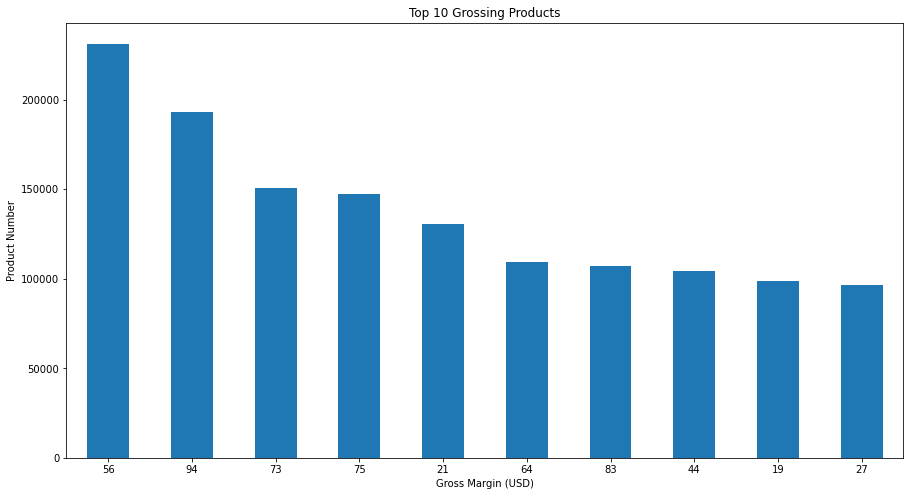

In [51]:
fig, ax = plt.subplots(figsize=(15, 8))
top_ten_gross_margins.plot(kind='bar', legend=False, rot=0, ax=ax);
ax.set_title('Top 10 Grossing Products')
ax.set_xlabel('Gross Margin (USD)')
ax.set_ylabel('Product Number')

